<a href="https://colab.research.google.com/github/NariMo91/GANs-generative-art/blob/main/grapple_stylegan_ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# grappleGAN
model: StyleGAN2-ADA

## GPU Type

In [ ]:
!nvidia-smi

Sun Oct 10 04:52:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Environment Set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Downgrade to previous Pytorch version

In [ ]:
!pip uninstall torch

Found existing installation: torch 1.9.0+cu102
Uninstalling torch-1.9.0+cu102:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.7/dist-packages/caffe2/*
    /usr/local/lib/python3.7/dist-packages/torch-1.9.0+cu102.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torch/*
Proceed (y/n)? y
y
y
  Successfully uninstalled torch-1.9.0+cu102


In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1

     |████████████████████████████████| 804.1 MB 2.0 kB/s 
     |████████████████████████████████| 17.4 MB 198 kB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.8.1 which is incompatible.


Install additional dependencies

In [ ]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

     |████████████████████████████████| 195 kB 2.2 MB/s 
     |████████████████████████████████| 108 kB 28.7 MB/s 
     |████████████████████████████████| 26.9 MB 173 kB/s 


#### Install NVIDIA StyleGAN2 ADA Pytorch

In [ ]:
!git clone https://github.com/NariMo91/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 3.09 MiB/s, done.
Resolving deltas: 100% (55/55), done.


## Convert Images

In [ ]:
!python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/grappleGAN/images/bjj1024 --dest /content/drive/MyDrive/grappleGAN/datasets/bjj1024

100% 2146/2146 [13:38<00:00,  2.62it/s]


In [ ]:
# If things go wrong
# !rm -R /content/drive/MyDrive/grappleGAN/datasets/bjj1024/*

## Initial Training

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

## Resume training

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
NETWORK = "network-snapshot-000112.pkl"
RESUME = "/content/drive/MyDrive/grappleGAN/results/00000-bjj1024-mirror-auto1/network-snapshot-000112.pkl"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
NETWORK = "network-snapshot-000080.pkl"
RESUME = "/content/drive/MyDrive/grappleGAN/results/00001-bjj1024-mirror-auto1-resumecustom/network-snapshot-000080.pkl"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
RESUME = "/content/drive/MyDrive/grappleGAN/results/00002-bjj1024-mirror-auto1-resumecustom/network-snapshot-000048.pkl"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
RESUME = "/content/drive/MyDrive/grappleGAN/results/00003-bjj1024-mirror-auto1-resumecustom/network-snapshot-000080.pkl"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/grappleGAN/results"
RESUME = "/content/drive/MyDrive/grappleGAN/results/00004-bjj1024-mirror-auto1-resumecustom/network-snapshot-000080.pkl"
DATA = "/content/drive/MyDrive/grappleGAN/datasets/bjj1024"
SNAP = 4
MIRRORED = True

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/grappleGAN/datasets/bjj1024",
    "use_labels": false,
    "max_size": 2146,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 3276

## Plot Metrics

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Extract FID from the multiple training runs

In [ ]:
# run 0
with open("/content/drive/MyDrive/grappleGAN/results/00000-bjj1024-mirror-auto1/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
# check that number of metrics records matches number of .pkl files
len(json_list)

8

In [ ]:
data = [json.loads(line) for line in json_list]
for i, _ in enumerate(data):
  data[i]['fid50k_full'] = data[i]['results']['fid50k_full']
  data[i]['kimg'] = i * 4 * 4

In [ ]:
data

[{'fid50k_full': 343.6344250747313,
  'kimg': 0,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 343.6344250747313},
  'snapshot_pkl': 'network-snapshot-000000.pkl',
  'timestamp': 1631164455.8096752,
  'total_time': 2390.3453526496887,
  'total_time_str': '39m 50s'},
 {'fid50k_full': 394.4450870468103,
  'kimg': 16,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 394.4450870468103},
  'snapshot_pkl': 'network-snapshot-000016.pkl',
  'timestamp': 1631173964.9908788,
  'total_time': 2289.9768319129944,
  'total_time_str': '38m 10s'},
 {'fid50k_full': 351.8962399656941,
  'kimg': 32,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 351.8962399656941},
  'snapshot_pkl': 'network-snapshot-000032.pkl',
  'timestamp': 1631183484.6562629,
  'total_time': 2290.557361841202,
  'total_time_str': '38m 11s'},
 {'fid50k_full': 319.82323843107656,
  'kimg': 48,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_

In [ ]:
# run 1
with open("/content/drive/MyDrive/grappleGAN/results/00001-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)

6

In [ ]:
data1 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data1):
  data1[i]['fid50k_full'] = data1[i]['results']['fid50k_full']
  data1[i]['kimg'] = (i * 4 * 4) + data[-1]['kimg'] #add kimg from previous run

In [ ]:
# run 2
with open("/content/drive/MyDrive/grappleGAN/results/00002-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)
# there are 3 metrics entries, but the next training run picks up from the 4th .pkl file. This must be accounted for when adding kimg to the next run

3

In [ ]:
data2 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data2):
  data2[i]['fid50k_full'] = data2[i]['results']['fid50k_full']
  data2[i]['kimg'] = (i * 4 * 4) + data1[-1]['kimg'] #add kimg from previous run

In [ ]:
# run 3
with open("/content/drive/MyDrive/grappleGAN/results/00003-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)

6

In [ ]:
data3 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data3):
  data3[i]['fid50k_full'] = data3[i]['results']['fid50k_full']
  data3[i]['kimg'] = (i * 4 * 4) + data2[-1]['kimg'] + 16 #add kimg from previous run

In [ ]:
# run 4
with open("/content/drive/MyDrive/grappleGAN/results/00004-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)

6

In [ ]:
data4 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data4):
  data4[i]['fid50k_full'] = data4[i]['results']['fid50k_full']
  data4[i]['kimg'] = (i * 4 * 4) + data3[-1]['kimg'] #add kimg from previous run

In [ ]:
# run 5
with open("/content/drive/MyDrive/grappleGAN/results/00005-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)

5

In [ ]:
data5 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data5):
  data5[i]['fid50k_full'] = data5[i]['results']['fid50k_full']
  data5[i]['kimg'] = (i * 4 * 4) + data4[-1]['kimg'] #add kimg from previous run

In [ ]:
# run 6
with open("/content/drive/MyDrive/grappleGAN/results/00006-bjj1024-mirror-auto1-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
len(json_list)

3

In [ ]:
data6 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data6):
  data6[i]['fid50k_full'] = data6[i]['results']['fid50k_full']
  data6[i]['kimg'] = (i * 4 * 4) + data5[-1]['kimg'] #add kimg from previous run

In [ ]:
fid_all = data + data1 + data2 + data3 + data4 + data5 + data6
df = pd.DataFrame(fid_all)
df = df.drop_duplicates(subset='kimg', keep='last')
df

,results,metric,total_time,total_time_str,num_gpus,snapshot_pkl,timestamp,fid50k_full,kimg
0,{'fid50k_full': 343.6344250747313},fid50k_full,2390.345353,39m 50s,1,network-snapshot-000000.pkl,1.631164e+09,343.634425,0
1,{'fid50k_full': 394.4450870468103},fid50k_full,2289.976832,38m 10s,1,network-snapshot-000016.pkl,1.631174e+09,394.445087,16
2,{'fid50k_full': 351.8962399656941},fid50k_full,2290.557362,38m 11s,1,network-snapshot-000032.pkl,1.631183e+09,351.896240,32
3,{'fid50k_full': 319.82323843107656},fid50k_full,2290.217507,38m 10s,1,network-snapshot-000048.pkl,1.631193e+09,319.823238,48
4,{'fid50k_full': 326.33323442719745},fid50k_full,2290.147933,38m 10s,1,network-snapshot-000064.pkl,1.631203e+09,326.333234,64
5,{'fid50k_full': 283.2206022085435},fid50k_full,2289.519640,38m 10s,1,network-snapshot-000080.pkl,1.631212e+09,283.220602,80
6,{'fid50k_full': 236.99933039037495},fid50k_full,2289.667427,38m 10s,1,network-snapshot-000096.pkl,1.631222e+09,236.999330,96
8,{'fid50k_full': 224.4355556856611},fid50k_full,3072.400557,51m 12s,1,network-snapshot-000000.pkl,1.631238e+09,224.435556,112
9,{'fid50k_full': 182.71522332100687},fid50k_full,2471.317870,41m 11s,1,network-snapshot-000016.pkl,1.631249e+09,182.715223,128
10,{'fid50k_full': 167.6171415519558},fid50k_full,2465.274207,41m 05s,1,network-snapshot-000032.pkl,1.631260e+09,167.617142,144


In [ ]:
# lowest FID achieved during training
round(df['fid50k_full'].min(), 2)

61.06

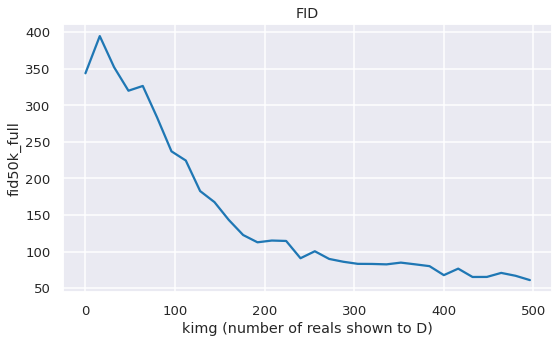

In [ ]:
sns.set_context('talk', font_scale=0.8)
sns.set_style('darkgrid')

plt.figure(figsize=(8,5))
sns.lineplot(x='kimg', y='fid50k_full', data=df)
plt.title('FID')
plt.tight_layout()
plt.xlabel('kimg (number of reals shown to D)')
plt.savefig('/content/drive/MyDrive/grappleGAN/grappleFID.png');